# Handwritten Digit Recognition using Keras

*@masahiro rikiso, 170204*

---

open this notebook by typing the following command in terminal:

```
$ jupyter nbextension enable --py widgetsnbextension
$ jupyter notebook
```

## 1) Preparation

In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

## 2) Load Mnist (Handwritten Digit)

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# print (X_train[0])

In [7]:
from matplotlib import pyplot as plt

In [8]:
%matplotlib inline
from ipywidgets import interact

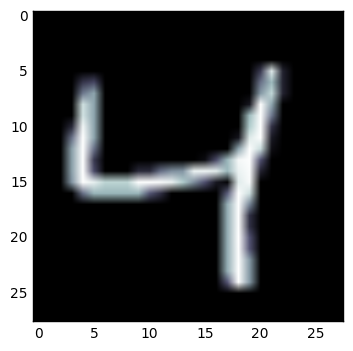

In [23]:
@interact(i=(0,10))
def plot(i=0):
    plt.imshow(X_train[i], cmap='bone')
    plt.show()

## 3) Create and Train Deep Neural Network(DNN)

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
#from keras.callbacks import TensorBoard

In [11]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [12]:
nb_classes = 10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [13]:
batch_size = 128
nb_epoch = 20

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

#tb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True)

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test)
#                    ,callbacks=[tb]
                   )
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 512)           401920      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 512)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 512)           0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 512)           262656      dropout_1[0][0]                  
___________________________________________________________________________________________

## 4) Test DNN model with unseen data

In [14]:
X_test[0].shape

(784,)

In [15]:
test_ = X_test[0].reshape(28,28)
test_.shape

(28, 28)

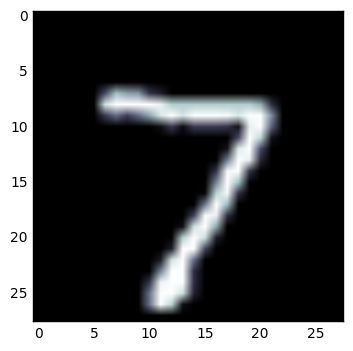

In [16]:
plt.imshow(test_, cmap='bone')

In [17]:
model.predict_classes(X_test[0].reshape(1,784))

1/1 [==============================] - 0s


array([7])

## 5) Visualize model

In [18]:
from keras.utils.visualize_util import plot
plot(model, to_file="model_mlp.png", show_shapes=True, show_layer_names=True)

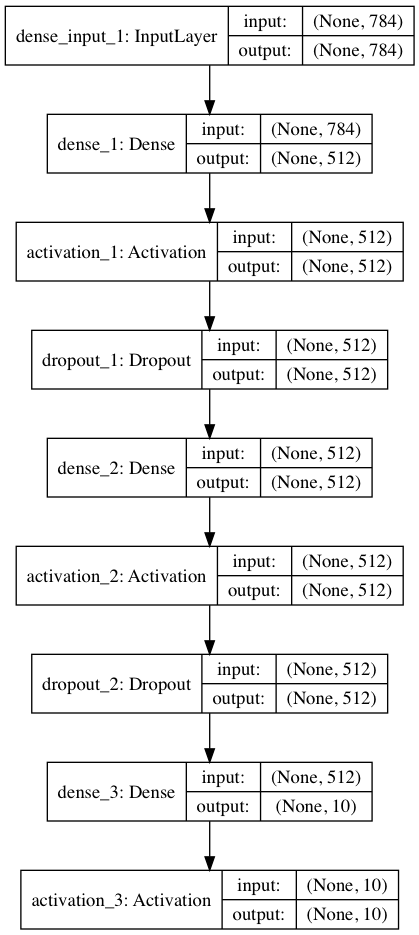

In [3]:
from IPython.display import Image
Image("model_mlp.png")

In [ ]:
from IPython.display import 

## 6) Visualize training log

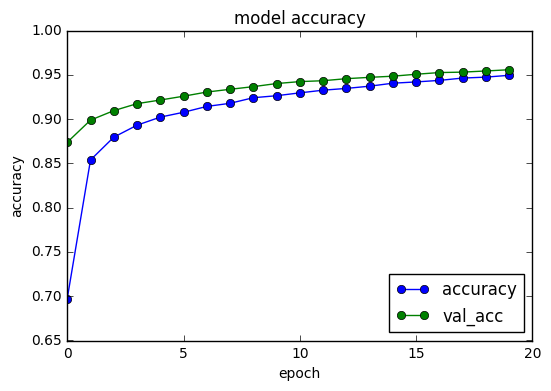

In [19]:
fig = plt.figure()
plt.plot(history.history['acc'],"o-",label="accuracy")
plt.plot(history.history['val_acc'],"o-",label="val_acc")
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc="lower right")

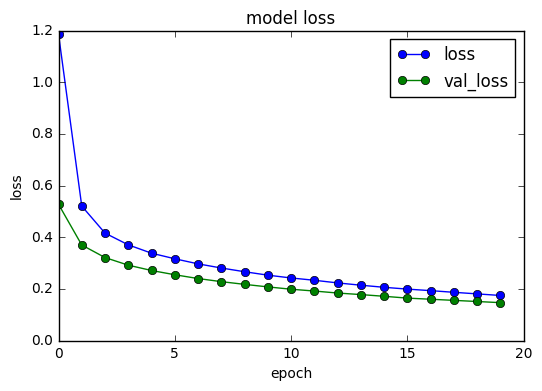

In [21]:
fig = plt.figure()
plt.plot(history.history['loss'],"o-",label="loss",)
plt.plot(history.history['val_loss'],"o-",label="val_loss")
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')